In [8]:
import os

import shutil
import cv2 as cv
import numpy as np
import pandas as pd
from tqdm import tqdm
from PIL import Image
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten


!mkdir dataset
!mkdir dataset/dog
!mkdir dataset/cat

In [10]:
os.listdir('/kaggle/working/dataset')

['dog', 'cat']

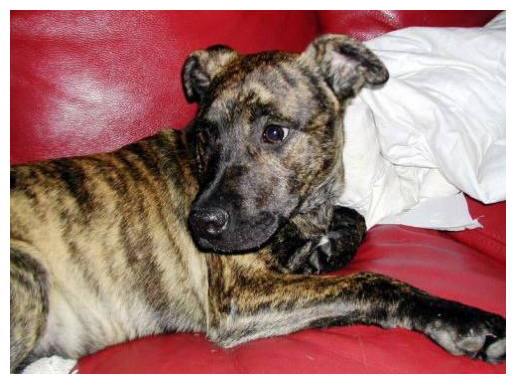

In [11]:
img = Image.open('/kaggle/input/dogs-vs-cats/train/train/dog.375.jpg')

plt.imshow(img)
plt.axis('off')  # removes axes and grid
plt.show()

In [12]:
for img in tqdm(os.listdir('/kaggle/input/dogs-vs-cats/train/train')):

    if 'cat' in img:
        scr_img_path = '/kaggle/input/dogs-vs-cats/train/train/' + img
        dst_img_path = '/kaggle/working/dataset/cat/'+ img     

    else:
        scr_img_path = '/kaggle/input/dogs-vs-cats/train/train/' + img
        dst_img_path = '/kaggle/working/dataset/dog/'+ img
        
    shutil.copy(scr_img_path, dst_img_path)

100%|██████████| 25000/25000 [04:11<00:00, 99.57it/s] 


In [13]:
train_datagen = ImageDataGenerator( rescale = 1/255., 
                    shear_range = 0.2, 
                    zoom_range = 0.2,
                    horizontal_flip = True)

test_datagen = ImageDataGenerator( rescale = 1/255.)

In [14]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape = (128,128,3), activation = 'relu'))
model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D( pool_size = (2,2)))

model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(Conv2D(64, (3,3), activation = 'relu'))
model.add(MaxPooling2D( pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(128, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile( optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Check TensorFlow version
print(tf.__version__)  # Ensure it's 2.x


base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

# base_model.summary()

model = Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

train_set = train_datagen.flow_from_directory('/kaggle/working/dataset/', 
                                    target_size = (224,224),
                                    class_mode = 'binary',
                                    batch_size = 100)

# model.fit(train_set,epochs = 10)

history = model.fit( train_set, epochs=10)

2.17.1
Found 25000 images belonging to 2 classes.
Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 285s 1s/step - accuracy: 0.7688 - loss: 0.7156
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.8906 - loss: 0.2606
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.8966 - loss: 0.2453
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.9009 - loss: 0.2210
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 263s 1s/step - accuracy: 0.9087 - loss: 0.2117
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 266s 1s/step - accuracy: 0.9185 - loss: 0.1963
Epoch 7/10
 60/250 ━━━━━━━━━━━━━━━━━━━━ 3:19 1s/step - accuracy: 0.9105 - loss: 0.1964

In [15]:
train_set = train_datagen.flow_from_directory('/kaggle/working/dataset/', 
                                    target_size = (128,128),
                                    class_mode = 'binary',
                                    batch_size = 100)

Found 25000 images belonging to 2 classes.


In [16]:
model.fit(train_set,epochs = 10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


250/250 ━━━━━━━━━━━━━━━━━━━━ 114s 412ms/step - accuracy: 0.5827 - loss: 0.6835
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 107s 414ms/step - accuracy: 0.7281 - loss: 0.5341
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 105s 410ms/step - accuracy: 0.7864 - loss: 0.4561
Epoch 4/10
 47/250 ━━━━━━━━━━━━━━━━━━━━ 1:26 424ms/step - accuracy: 0.8118 - loss: 0.4195

KeyboardInterrupt: 